In [1]:
import gym
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
env = gym.make('FrozenLake-v0')

In [2]:
input_size = env.observation_space.n
output_size = env.action_space.n
learning_rate = 0.1

In [3]:
X = tf.placeholder(shape=[1, input_size],dtype=tf.float32)
W = tf.Variable(tf.random_uniform([input_size, output_size],0,0.01))

In [4]:
Qpred = tf.matmul(X, W)
Y = tf.placeholder(shape=[1, output_size],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(Y - Qpred))
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [5]:
dis = .99
num_episodes = 2000
rList = []

In [6]:
def one_hot(x):
    return np.identity(16)[x:x+1]

In [7]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for i in range(num_episodes):
        s = env.reset()
        e = 1. / ((i/50)+10)
        rAll = 0
        done = False
        local_loss = []
        
        while not done:
            Qs = sess.run(Qpred, feed_dict={X: one_hot(s)})
            if np.random.rand(1) < e:
                a = env.action_space.sample()
            else:
                a = np.argmax(Qs)
            
            s1, reward, done, _ = env.step(a)
            if done:
                Qs[0, a] = reward
            else:
                Qs1 = sess.run(Qpred, feed_dict={X: one_hot(s1)})
                Qs[0,a] = reward + dis * np.max(Qs1)
            sess.run(train, feed_dict={X: one_hot(s), Y: Qs})
            
            rAll += reward
            s = s1
        rList.append(rAll)

Percent of successful episodes: 0.482%


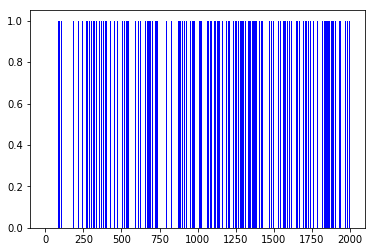

In [8]:
print("Percent of successful episodes: " + str(sum(rList)/num_episodes) + "%")
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

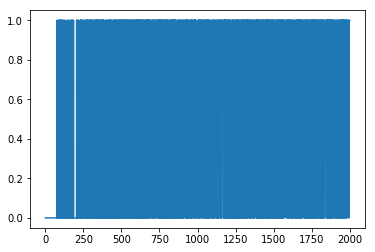

In [9]:
plt.plot(rList)
plt.show()